<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/Clouding_Atlassian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clouding Atlassian Architecture Example

* [Current State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=wVFxWnQnazpr&line=1&uniqifier=1)
* [Future State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=8cRYTJwteobu&line=1&uniqifier=1)

## Why 

Keeping architecture diagrams up to date is difficult. Creating them is just as difficult. Architects spend most of their time gathering the right icons, drawing lines in Miro or Viso making sure that they are the right type etc. etc. etc. What a waste of time. 

Instead architects should be focused on ensuring that the current state is correct and that proposed changes to the enterprise ecosystem have taken into account all other systems that may be impacted. 

Architecture diagrams as code (ADAC) is a way of allowing architects to focus on the right things and stop wasting time. It can also help other areas of the business by creating or leveraging a configuration management database (CMDB). 

ADAC can also be extended to include the personas that interact with the systems. This is an important part of the impact analysis and can be the starting point for other agile techniques such as epic and story writing. 

## Guide 

Colab is a free tool for google users which makes it a perfect candidate for any company but especially a company that uses google drive. It is possible to connect this repository to Google Drive and/or Github for further document control and archiving. 

*C4 Model* is a great starting point for any architecture diagram repository as they can easily map to the the levels of testing, for example context is system testing, code is unit testing. With the right diagrams and subsequently the right level of thinking architecture, development and testing can all use the same diagrams to create meaningful and valuable assets for the company. See https://c4model.com/ for more details. 

*Diagrams* is a phyton library that allows for diagrams to be created from code. See https://diagrams.mingrammer.com/docs/nodes/c4 for more details. 

## How to run 

Run notebook cells in order. Please install "diagrams" first, and then default settings to correctly set up the environment.

The simplest way to do this is Ctrl-F9 to "Run all".

## Things to do 

This is just an example, as such there are a few things that can be created to ensure that this is enterprise ready. 

Firstly, the repository can be extracted into a stand alone Python file (.py). This file can be generated from the CMDB or json or whatever. 

```python 
from urllib import request
request.urlretrieve('https://git/main/Repository.py', 'Repository.py')
```
then loading the model and classes 
```python 
from Repository import OurSystems, OurPersonas, OurDataStores, OurExternalSystems
```

Obviously, this also means that we could create seperate files for systems, external systems, personas, etc. and load them into the context. These can continue to be extended by delivery teams with new personas or systems. 

Repositories could also be versioned and released as required with leadership oversight and approvals.

There could also be current state and future state repositories which update as new systems are added and retired.

The created images can be exported to google drive or downloaded manually and included in confluence documentation. There is also Jupyter plugins for confluence that allow for visualisation (e.g. https://marketplace.atlassian.com/apps/1220365/jupyter-notebook-viewer-for-confluence?tab=overview&hosting=cloud) 

Finally, the cell called *"Reflected Respository"* prints out the details of the components available in the repository. The script includes the following line:
```python 
  if cls[0].startswith('Our'):
```
which shows only those classes that start with Our, e.g. OurSystems, OurPersonas. This could be done with python class metadata, for example: 
```python 
OurSystems = type('', (), {'revision': 'v1.0', 'approved_by': 'John Doe'} )
print(OurSystems.revision, OurSystems.approved_by)
```
or with decorators
```python 
def decorator(cls):
  class NewClass(cls):
     attr = 100
     return NewClass

@decorator
  class X:
    pass
```

In [190]:
#@title Install Diagrams
!pip install diagrams &> /dev/null

In [191]:
#@title Default Settings

from diagrams import Diagram
from diagrams.c4 import Person, Container, Database, System, SystemBoundary, Relationship
from diagrams.custom import Custom
from IPython.display import SVG, display, Image

def _format_node_label(name, key, description):
  title = f'<font point-size="12"><b>{name}</b></font><br/>'
  subtitle = f'<font point-size="9">[{key}]<br/></font>' if key else ""
  text = f'<br/><font point-size="10">{description}</font>' if description else ""
  return f"<{title}{subtitle}{text}>"

def _get_custom_node_icon(name, url):
  try:
    urlretrieve(url, name)
  except:
    try:
      urlretrieve("https://cdn-icons-png.flaticon.com/512/10448/10448063.png", name)
    except:
      pass
  return name

#@markdown ----------------------------------------------
#@markdown ## Attributes

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"

}

In [200]:
#@title Respository
from urllib.request import urlretrieve

#@markdown ----------------------------------------------
#@markdown # Our Systems
class OurSystems():

  #@markdown + Disc (Disc)
  def Disc(): 
    return lambda: System( **{
      "name" : "Disc", 
      "technology" : "IBMi", 
      "description" : "Disc",
      "label": _format_node_label("DISC", "System", "IBMi"), 
      "_attributes": { 
          "one": "two"
      }
    })

  #@markdown + Bamboo (Server) (Bamboo)
  def Bamboo(): 
    return lambda: Container( **{ 
      "name" : "Bamboo (Server)",
      "technology" : "Linux",
      "description" : "Bamboo.",
      "label": _format_node_label("Bamboo (Server)", "Container", "Linux <br/> bamboo.budgetdirect.com.au <br/> 192.168.61.150"), 
      "_attributes": { 
          "one": "two"
      }
    })

  #@markdown + Confluence (Server) (Confluence)
  def Confluence(): 
    return lambda: Container( **{ 
      "name" : "Confluence (Server)",
      "technology" : "Linux",
      "description" : "Confluence",
      "label": _format_node_label("Confluence (Server)", "Container", "Linux <br/> confluence.budgetdirect.com.au <br/> 192.168.110.100"), 
      "_attributes": { 
          "CPU": "", 
          "RAM": "",
          "Storage": "124.5GB",
          "Type": "V", 
          "OS": "Linux", 
          "Network Zone": "",
          "Confluence Application Version": "8.13.2"
      }
    })

  #@markdown + Jira (Server) (Jira)
  def Jira():
    return lambda: Container( **{ 
      "name" : "Jira (Server)",
      "technology" : "Linux",
      "description" : "jira.budgetdirect.com.au",
      "label": _format_node_label("Jira (Server)", "Container", "Linux <br/> jira.budgetdirect.com.au <br/> 192.168.110.46"), 
    })

  #@markdown + Active Directory (ActiveDirectory)
  def ActiveDirectory():
    return lambda: Custom( **{ 
      "label" : "Active Directory",
      "icon_path" : _get_custom_node_icon("ActiveDirectory.png", "https://www.outsystems.com/Forge_CW/_image.aspx/Q8LvY--6WakOw9afDCuuGXsjTvpZCo5fbFxdpi8oIBI=/active-directory-core-simplified-2023-01-04%2000-00-00-2023-05-05%2011-44-13")
    })

  #@markdown + The Hub (TheHub)
  def TheHub(): 
    return  lambda: System( **{ 
      "name" : "The Hub",
      "description" : "The hub."
    })

#@markdown ----------------------------------------------
#@markdown # Our External Systems
class OurExternalSystems(): 

  #@markdown + BitBucket (BitBucket)
  def BitBucket(): 
    return lambda: Custom( **{ 
      "label" : "BitBucket",
      "icon_path" : _get_custom_node_icon("BitBucket.png", "https://bitbucket.icon")
    })

  #@markdown + Jenkins (Jenkins)
  def Jenkins(): 
    return lambda: Custom( **{ 
      "label" : "Jenkins",
      "icon_path" : _get_custom_node_icon("Jenkins.png", "https://jenkins.icon")
    })

  #@markdown + Power BI (PowerBI)
  def PowerBI():     
    return lambda: Custom( **{ 
      "label" : "Power BI",
      "icon_path" : _get_custom_node_icon("PowerBI.png", "https://www.clipartmax.com/png/middle/16-161548_power-bi-logo-microsoft-vector-eps-free-download-icons-power-bi-logo.png")
    })

  #@markdown + Service Now (ServiceNow)
  def ServiceNow():
    return lambda: Custom( **{ 
      "label" : "Service Now",
      "icon_path" : _get_custom_node_icon("ServiceNow.png", "https://servicenow.icon")
    })

  #@markdown + GitLab (GitLab)
  def GitLab(): 
    return lambda: Custom( **{ 
      "label" : "GitLab",
      "icon_path" : _get_custom_node_icon("Gitlab.png", "https://about.gitlab.com/images/press/logo/png/gitlab-logo-100.png")
    })

  #@markdown + Okta (Okta)
  def Okta(): 
    return lambda: Custom( **{ 
      "label" : "Okta",
      "icon_path" : _get_custom_node_icon("Okta.png", "https://okta.icon")
    })

  #@markdown + Citrix (Citrix)
  def Citrix(): 
    return lambda: Custom( **{ 
      "label" : "Citrix",
      "icon_path" : _get_custom_node_icon("Citrix.png", "https://citrix.icon")
    })

  #@markdown + Global Protect (GlobalProtect)
  def GlobalProtect(): 
    return lambda: Custom( **{ 
      "label" : "Global Protect",
      "icon_path" : _get_custom_node_icon("GlobalProtect.png", "https://globalprotect.icon")
    })

  #@markdown + Confluence (Atlassian) (Confluence)
  def Confluence(): 
    return lambda: System( **{ 
      "name" : "Confluence (Atlassian)",
      "technology" : "Cloud",
      "description" : "Confluence",
      "label": _format_node_label("Confluence (Server)", "SAAS", "Atlassian"), 
      "_attributes": { 
          "one": "two"
      }
    })

  #@markdown + Jira (Atlassian) (Jira)
  def Jira():
    return lambda: System( **{ 
      "name" : "Jira (Atlassian)",
      "technology" : "Linux",
      "description" : "Jira",
      "label": _format_node_label("Jira (Server)", "SAAS", "Atlassian"), 
    })

#@markdown ----------------------------------------------
#@markdown # Our Personas
class OurPersonas(): 

  #@markdown + A&G Internal Users (AGInternalUsers)
  def AGInternalUsers(): 
    return lambda: Person( **{
      "name" : "A&G Internal Users", 
      "description" : "A&G Internal Users."
    })

  #@markdown + A&G Remote Users (AGRemoteUsers)
  def AGRemoteUsers(): 
    return lambda: Person( **{
      "name" : "A&G Remote Users", 
      "description" : "A&G Remote Users."
    })

  #@markdown + A&G External Users (AGExternalUsers)
  def AGExternalUsers(): 
    return lambda: Person( **{
      "name" : "A&G External Users", 
      "description" : "A&G External Users."
    })

In [193]:
#@title Current State Atlassian Suite Context Diagram

current_state_atlassian_suite_settings =  {
  "name": "Current State Atlassian Suite Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** current_state_atlassian_suite_settings) as current_state_atlassian_suite_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + AGInternalUsers
  internalUsers = OurPersonas.AGInternalUsers()()

  #@markdown + AGRemoteUsers
  remoteUsers = OurPersonas.AGRemoteUsers()()

  #@markdown + AGExternalUsers
  externalUsers = OurPersonas.AGExternalUsers()()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown A&G On-Premise
  with SystemBoundary("A&G On-Premise"):
    #@markdown + ActiveDirectory
    activeDirectory = OurSystems.ActiveDirectory()()

    #@markdown + GlobalProtect
    globalProtect = OurExternalSystems.GlobalProtect()()

    #@markdown + Bamboo (Server)
    bamboo = OurSystems.Bamboo()()

    #@markdown + Confluence (Server)
    confluence = OurSystems.Confluence()()

    #@markdown + Jira (Server)
    jira = OurSystems.Jira()()

    #@markdown + DISC
    disc = OurSystems.Disc()()

    #@markdown + Citrix
    citrix = OurExternalSystems.Citrix()()

  #@markdown A&G Amazon Cloud
  with SystemBoundary("A&G Amazon Cloud"):
    #@markdown + BitBucket
    bitBucket = OurExternalSystems.BitBucket()()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Jenkins  
  jenkins = OurExternalSystems.Jenkins()()

  #@markdown + Service Now
  serviceNow = OurExternalSystems.ServiceNow()()

  #@markdown + PowerBi
  powerBi = OurExternalSystems.PowerBI()()

  #@markdown + The Hub
  theHub = OurSystems.TheHub()()

  #@markdown + Okta
  okta = OurExternalSystems.Okta()()

  #@markdown + GitLab
  gitLab = OurExternalSystems.GitLab()()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]

  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]

  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << jira
  jira >> Relationship("OAuth") << [bitBucket, confluence]

  globalProtect >> Relationship("??") << [activeDirectory]

  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]

  confluence >> Relationship("??") >> [theHub]
  confluence >> Relationship("OAuth") >> [bitBucket]

  jira >> Relationship("API") >> [powerBi]

  bitBucket >> Relationship("??") >> [jenkins]

#current_state_atlassian_suite_context_diagram

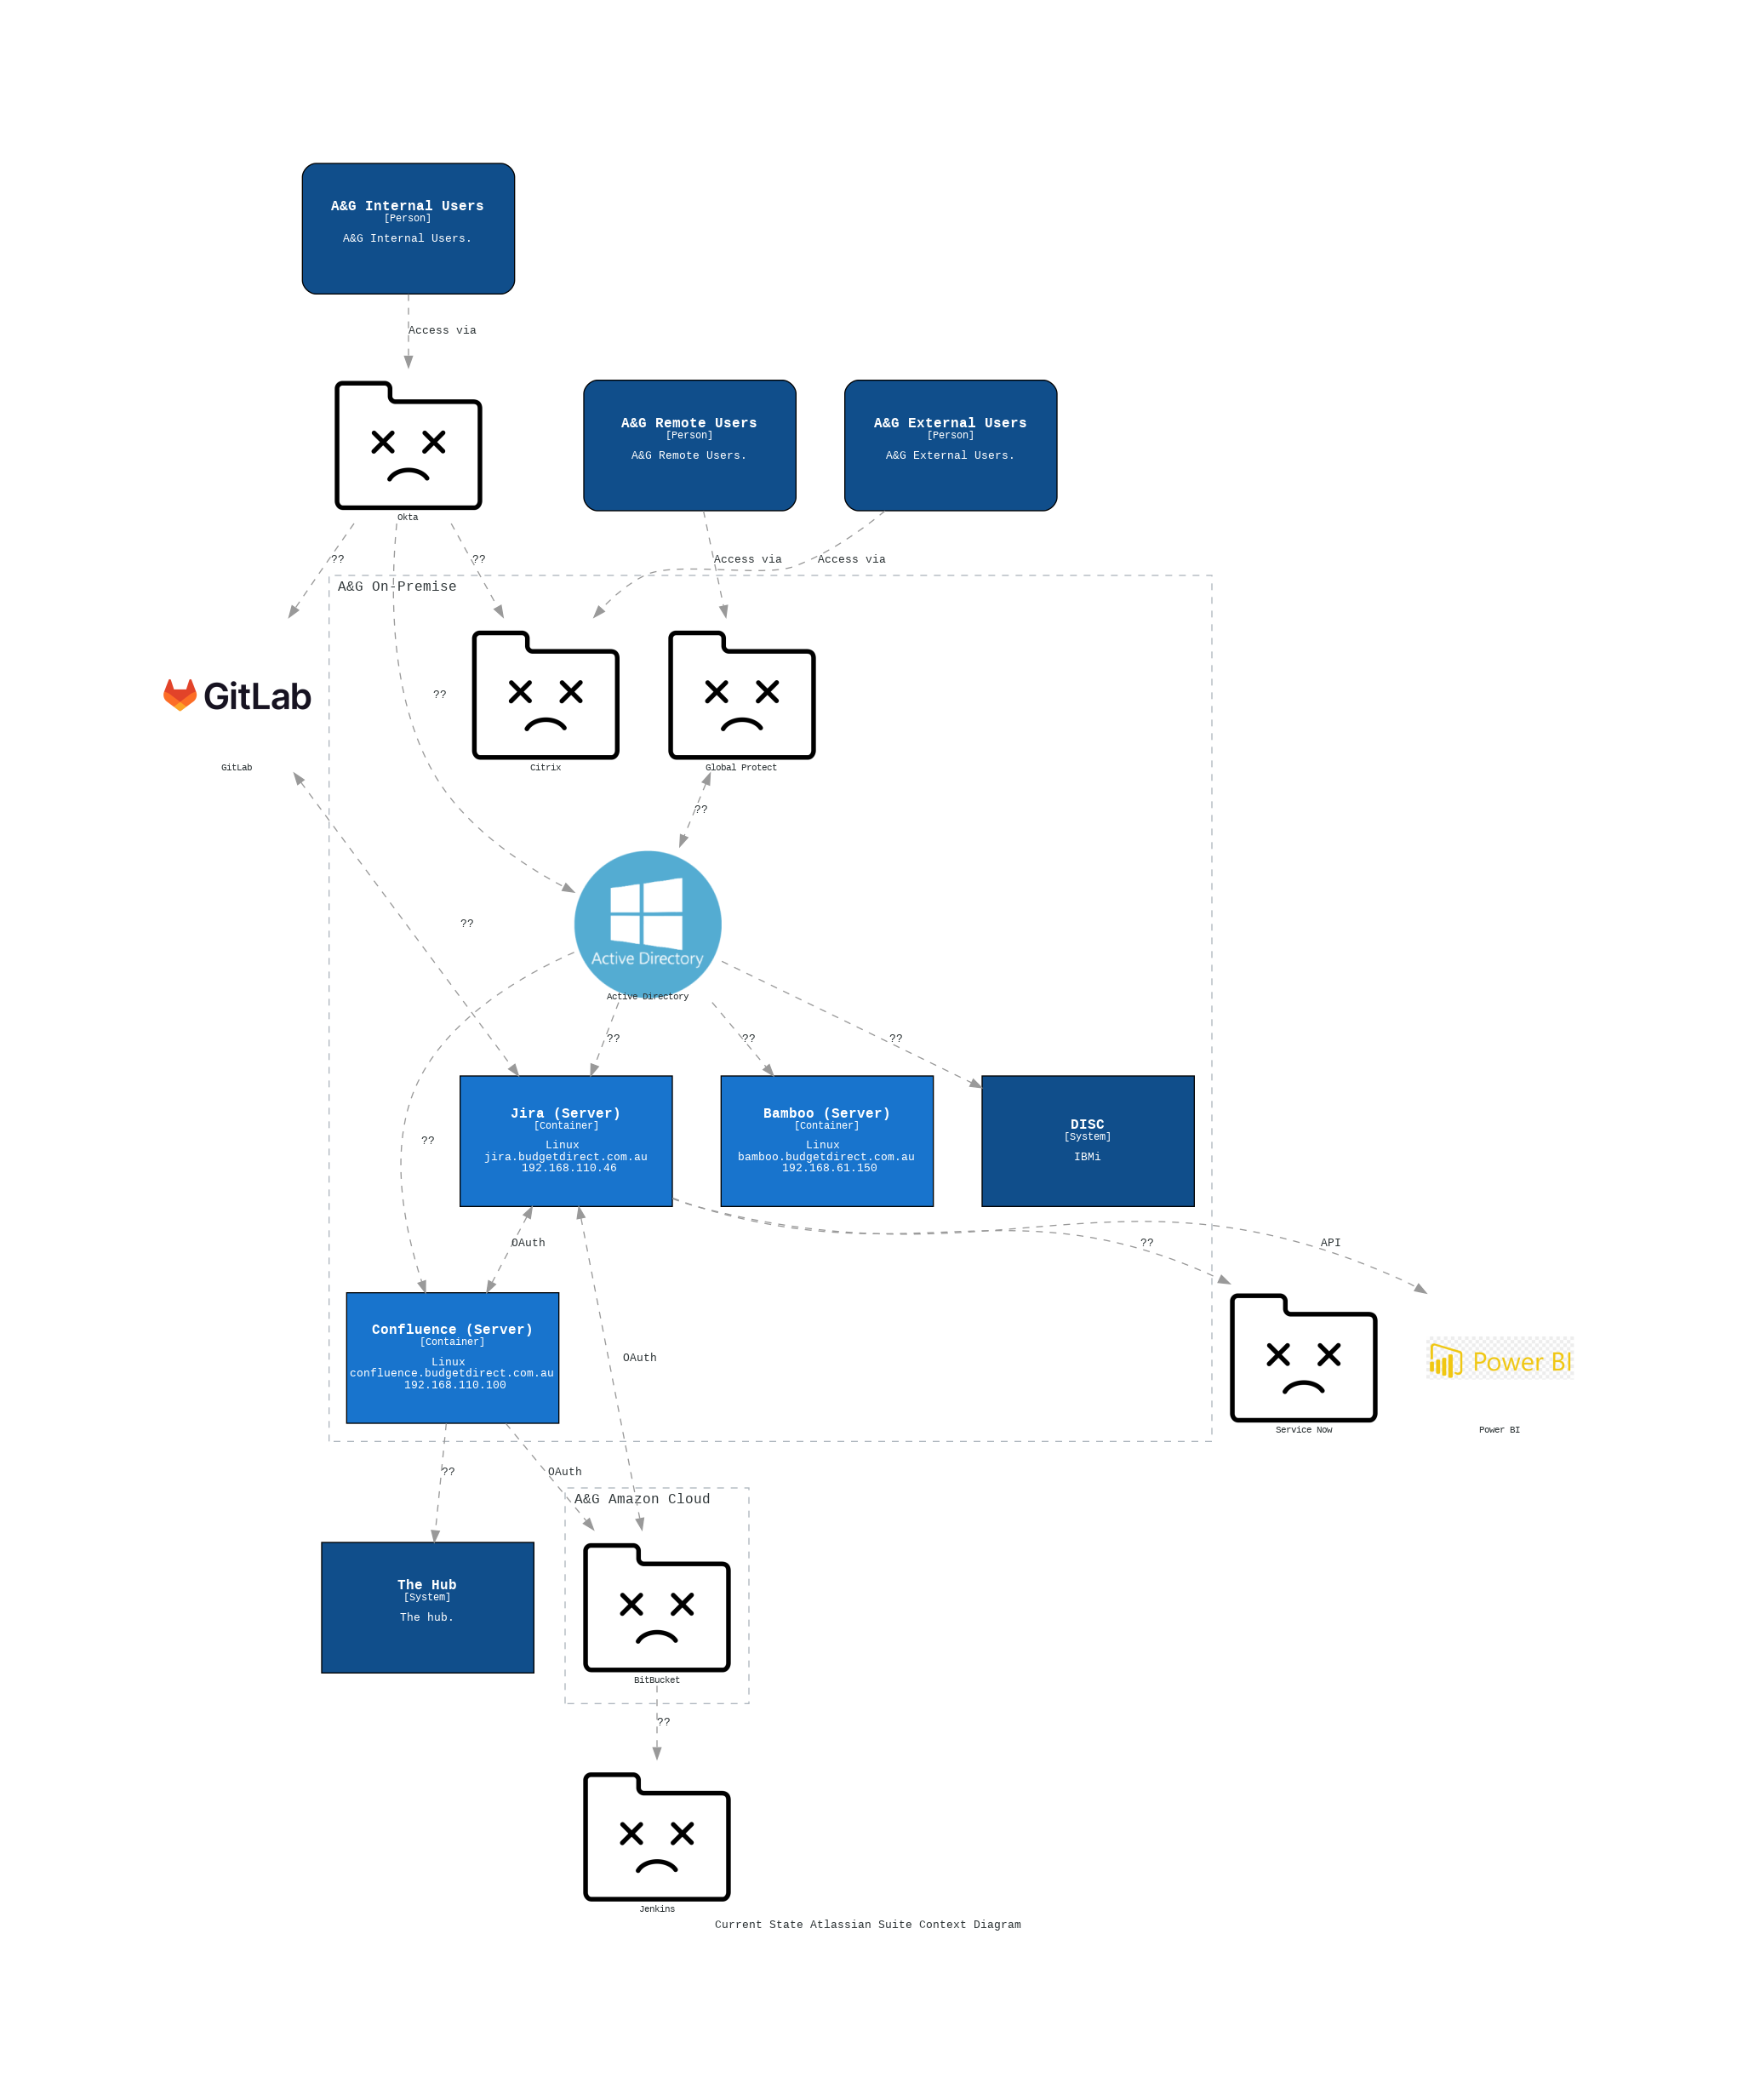

In [194]:
Image('/content/current_state_atlassian_suite_context_diagram.png')

In [195]:
#@title Future State Atlassian Suite Context Diagram

future_state_atlassian_suite_settings =  {
  "name": "Future State Atlassian Suite Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** future_state_atlassian_suite_settings) as future_state_atlassian_suite_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + AGInternalUsers
  internalUsers = OurPersonas.AGInternalUsers()()

  #@markdown + AGRemoteUsers
  remoteUsers = OurPersonas.AGRemoteUsers()()

  #@markdown + AGExternalUsers
  externalUsers = OurPersonas.AGExternalUsers()()

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown A&G On-Premise
  with SystemBoundary("A&G On-Premise"):
    #@markdown + ActiveDirectory
    activeDirectory = OurSystems.ActiveDirectory()()

    #@markdown + GlobalProtect
    globalProtect = OurExternalSystems.GlobalProtect()()

    #@markdown + Bamboo (Server)
    bamboo = OurSystems.Bamboo()()

    #@markdown + DISC
    disc = OurSystems.Disc()()

    #@markdown + Citrix
    citrix = OurExternalSystems.Citrix()()

  #@markdown A&G Amazon Cloud
  with SystemBoundary("A&G Amazon Cloud"):
    #@markdown + BitBucket
    bitBucket = OurExternalSystems.BitBucket()()

  #@markdown Atlassian
  with SystemBoundary("Atlassian"):
    #@markdown + Confluence (Server)
    confluence = OurExternalSystems.Confluence()()

    #@markdown + Jira (Server)
    jira = OurExternalSystems.Jira()()

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Jenkins  
  jenkins = OurExternalSystems.Jenkins()()

  #@markdown + Service Now
  serviceNow = OurExternalSystems.ServiceNow()()

  #@markdown + PowerBi
  powerBi = OurExternalSystems.PowerBI()()

  #@markdown + The Hub
  theHub = OurSystems.TheHub()()

  #@markdown + Okta
  okta = OurExternalSystems.Okta()()

  #@markdown + GitLab
  gitLab = OurExternalSystems.GitLab()()

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]

  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]

  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << jira
  jira >> Relationship("OAuth") << [bitBucket, confluence]

  globalProtect >> Relationship("??") << [activeDirectory]

  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]

  confluence >> Relationship("??") >> [theHub]
  confluence >> Relationship("OAuth") >> [bitBucket]

  jira >> Relationship("API") >> [powerBi]

  bitBucket >> Relationship("??") >> [jenkins]

#future_state_atlassian_suite_context_diagram

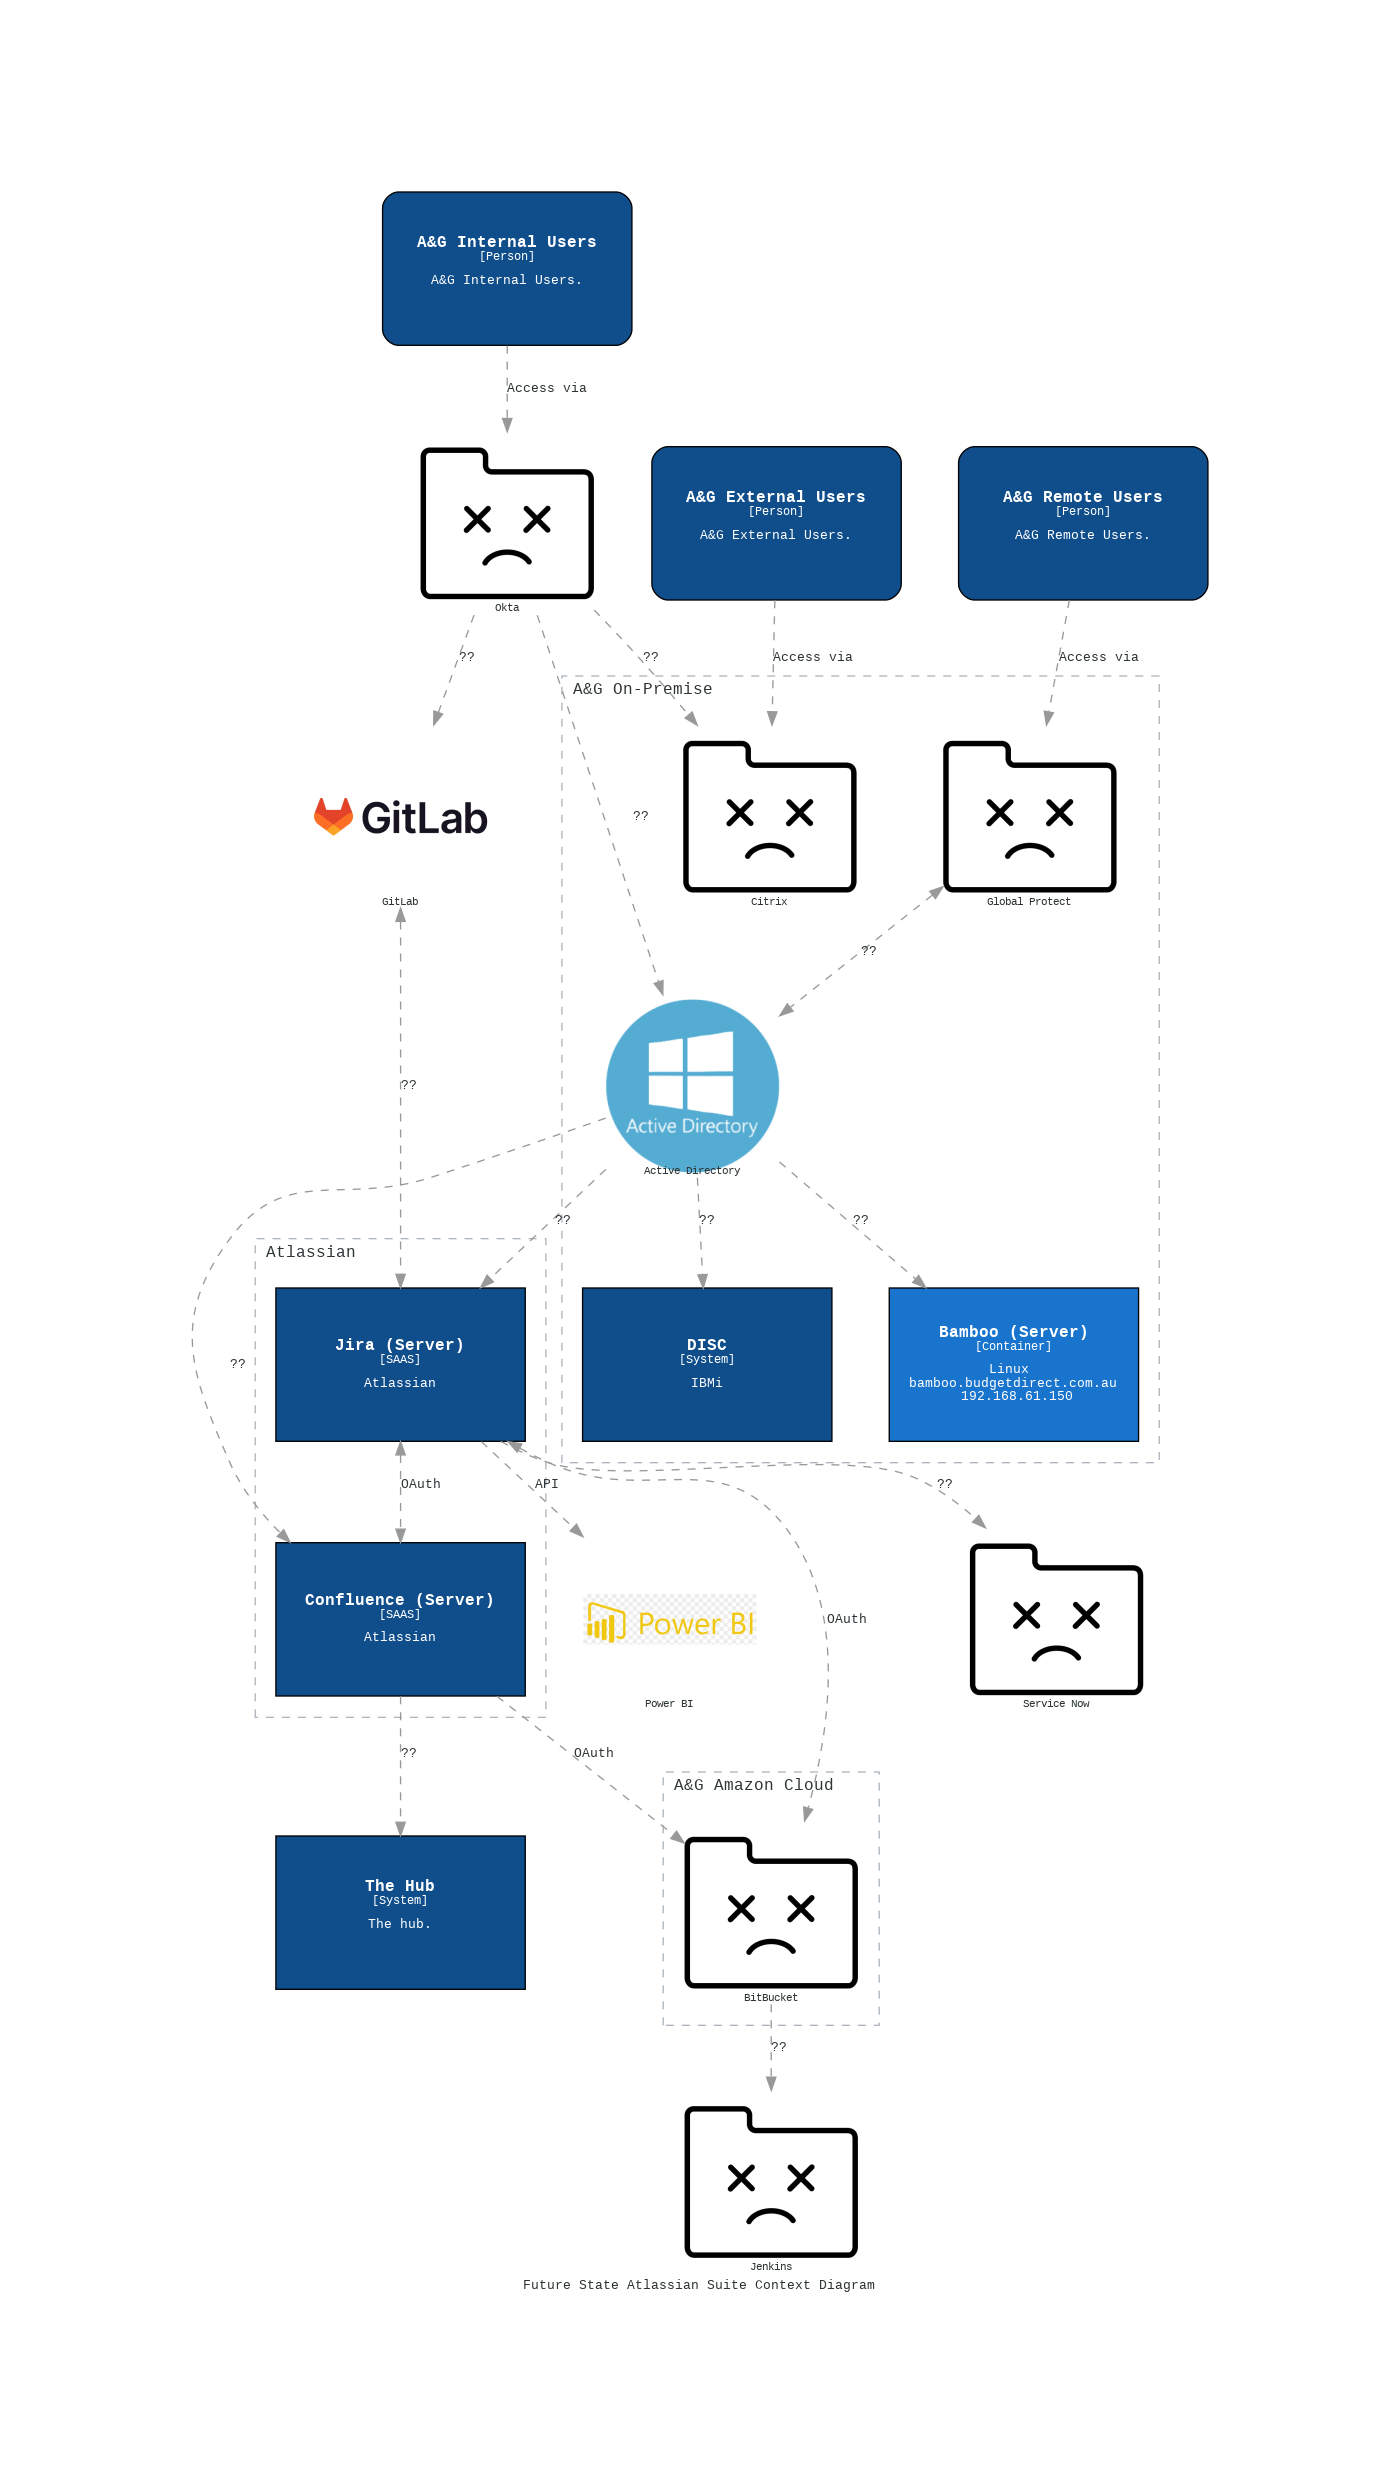

In [196]:
Image('/content/future_state_atlassian_suite_context_diagram.png')

In [197]:
#@title Reflected Repository
from IPython.display import display, Markdown
import sys, inspect
import html
import re

regx = re.compile("\{(.*)\}")
header = """| Key         | Value       | 
            | ----------- | ----------- |"""

for cls in inspect.getmembers(sys.modules[__name__], inspect.isclass):
  if cls[0].startswith('Our'):
    display(Markdown('---'))
    display(Markdown('## ' + cls[0]))
    for m in (method for method in dir(cls[1]) if method.startswith('__') is False):
      display(Markdown('### ' + m))
      attributes = []
      try:        
        p = inspect.getsource(getattr(cls[1], m)()).strip().replace("\n", "")
        res = eval( "{" + regx.search(p).group(1) + "}" )
        table = header
        for k, v in res.items():
          if (k == "_attributes"): 
            attributes = v
          else:
            if isinstance(v, str):
              table = table + "\n| " + k + " | " + v + " |"         
            else:
              table = table + "\n| " + k + " | " + str(v) + " |" 
        display(Markdown(table))

        if (attributes):
          display(Markdown('#### Attributes'))
          table = header
          for k, v in attributes.items():
            if isinstance(v, str):
              table = table + "\n| " + k + " | " + v + " |"         
            else:
              table = table + "\n| " + k + " | " + str(v) + " |" 
          display(Markdown(table))

      except:        
        #display(res)
        pass

---

## OurExternalSystems

### BitBucket

| Key         | Value       | 
            | ----------- | ----------- |
| label | BitBucket |
| icon_path | BitBucket.png |

### Citrix

| Key         | Value       | 
            | ----------- | ----------- |
| label | Citrix |
| icon_path | Citrix.png |

### Confluence

| Key         | Value       | 
            | ----------- | ----------- |
| name | Confluence (Atlassian) |
| technology | Cloud |
| description | Confluence |
| label | <<font point-size="12"><b>Confluence (Server)</b></font><br/><font point-size="9">[SAAS]<br/></font><br/><font point-size="10">Atlassian</font>> |

#### Attributes

| Key         | Value       | 
            | ----------- | ----------- |
| one | two |

### GitLab

| Key         | Value       | 
            | ----------- | ----------- |
| label | GitLab |
| icon_path | Gitlab.png |

### GlobalProtect

| Key         | Value       | 
            | ----------- | ----------- |
| label | Global Protect |
| icon_path | GlobalProtect.png |

### Jenkins

| Key         | Value       | 
            | ----------- | ----------- |
| label | Jenkins |
| icon_path | Jenkins.png |

### Jira

| Key         | Value       | 
            | ----------- | ----------- |
| name | Jira (Atlassian) |
| technology | Linux |
| description | Jira |
| label | <<font point-size="12"><b>Jira (Server)</b></font><br/><font point-size="9">[SAAS]<br/></font><br/><font point-size="10">Atlassian</font>> |

### Okta

| Key         | Value       | 
            | ----------- | ----------- |
| label | Okta |
| icon_path | Okta.png |

### PowerBI

| Key         | Value       | 
            | ----------- | ----------- |
| label | Power BI |
| icon_path | PowerBI.png |

### ServiceNow

| Key         | Value       | 
            | ----------- | ----------- |
| label | Service Now |
| icon_path | ServiceNow.png |

---

## OurPersonas

### AGExternalUsers

| Key         | Value       | 
            | ----------- | ----------- |
| name | A&G External Users |
| description | A&G External Users. |

### AGInternalUsers

| Key         | Value       | 
            | ----------- | ----------- |
| name | A&G Internal Users |
| description | A&G Internal Users. |

### AGRemoteUsers

| Key         | Value       | 
            | ----------- | ----------- |
| name | A&G Remote Users |
| description | A&G Remote Users. |

---

## OurSystems

### ActiveDirectory

| Key         | Value       | 
            | ----------- | ----------- |
| label | Active Directory |
| icon_path | ActiveDirectory.png |

### Bamboo

| Key         | Value       | 
            | ----------- | ----------- |
| name | Bamboo (Server) |
| technology | Linux |
| description | Bamboo. |
| label | <<font point-size="12"><b>Bamboo (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> bamboo.budgetdirect.com.au <br/> 192.168.61.150</font>> |

#### Attributes

| Key         | Value       | 
            | ----------- | ----------- |
| one | two |

### Confluence

| Key         | Value       | 
            | ----------- | ----------- |
| name | Confluence (Server) |
| technology | Linux |
| description | Confluence |
| label | <<font point-size="12"><b>Confluence (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> confluence.budgetdirect.com.au <br/> 192.168.110.100</font>> |

#### Attributes

| Key         | Value       | 
            | ----------- | ----------- |
| one | two |

### Disc

| Key         | Value       | 
            | ----------- | ----------- |
| name | Disc |
| technology | IBMi |
| description | Disc |
| label | <<font point-size="12"><b>DISC</b></font><br/><font point-size="9">[System]<br/></font><br/><font point-size="10">IBMi</font>> |

#### Attributes

| Key         | Value       | 
            | ----------- | ----------- |
| one | two |

### Jira

| Key         | Value       | 
            | ----------- | ----------- |
| name | Jira (Server) |
| technology | Linux |
| description | jira.budgetdirect.com.au |
| label | <<font point-size="12"><b>Jira (Server)</b></font><br/><font point-size="9">[Container]<br/></font><br/><font point-size="10">Linux <br/> jira.budgetdirect.com.au <br/> 192.168.110.46</font>> |

### TheHub

| Key         | Value       | 
            | ----------- | ----------- |
| name | The Hub |
| description | The hub. |